# Tiny examples to learn a neural network model for regression test
##The below codes require some packages for drawing plots and processing tabular data associated with housing prices.
### written and revised by Kyong-Ha Lee(kyongha@kisti.re.kr) , July 6, 2023


## 1. Import required packages


In [1]:
#!pip install scikit-learn

#from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## 2. Loading Boston Housing dataset by using Scikit-Learn

In [2]:
#boston_dataset.target
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header= None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


## 3. Understanding the stats. of the dataset

In [3]:
#data = boston_dataset.data
type(data)


numpy.ndarray

In [4]:
#df = pd.DataFrame(data = data, columns = boston_dataset.feature_names)
df = pd.DataFrame(data = data, columns =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['Price'] = target
df.tail(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
#df.describe()
df[['AGE', 'LSTAT']].describe()

,AGE,LSTAT
count,506.000000,506.000000
mean,68.574901,12.653063
std,28.148861,7.141062
min,2.900000,1.730000
25%,45.025000,6.950000
50%,77.500000,11.360000
75%,94.075000,16.955000
max,100.000000,37.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
#sns.pairplot(df)

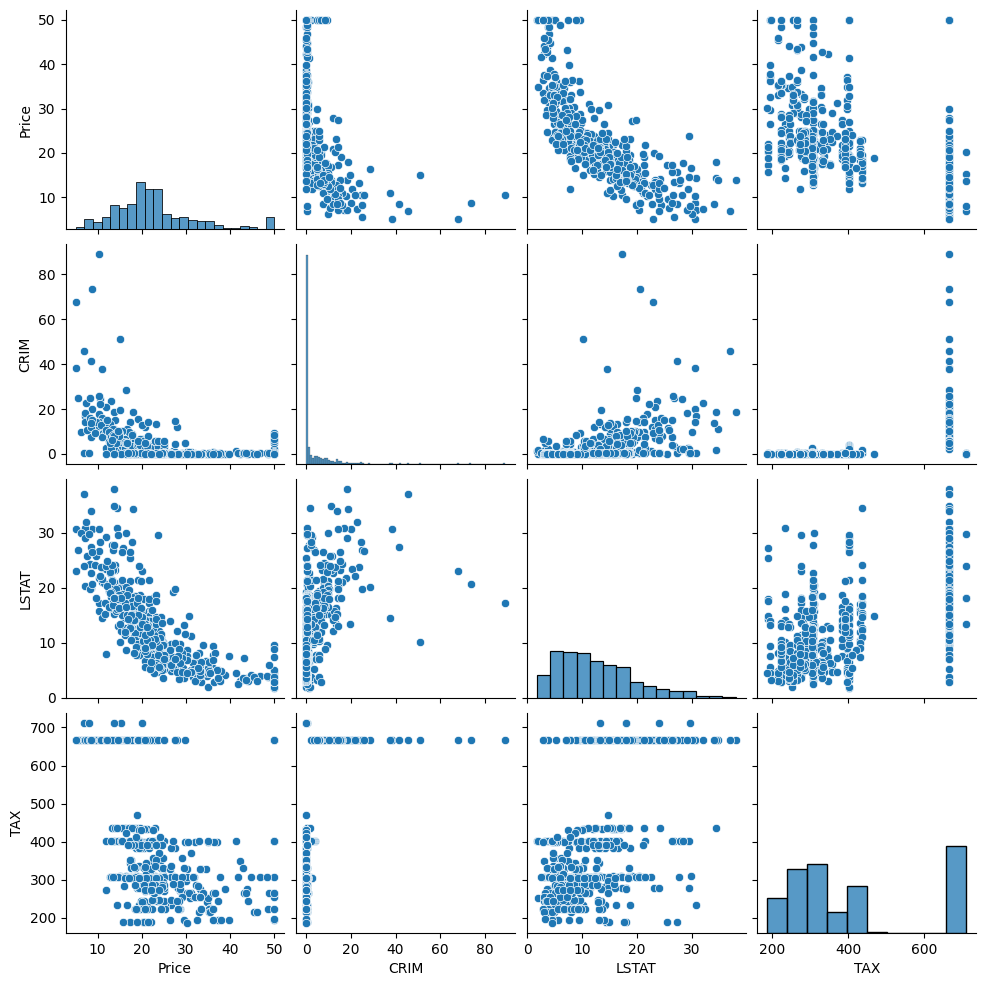

In [ ]:
cols = ['Price', 'CRIM', 'LSTAT', 'TAX']
sns.pairplot(df[cols])
plt.show()

<ipython-input-12-c392c3372d50>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax = ax[i][j])
<ipython-input-12-c392c3372d50>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax = ax[i][j])
<ipython-input-12-c392c3372d50>:10: UserWarning: 

`distplot` is a dep

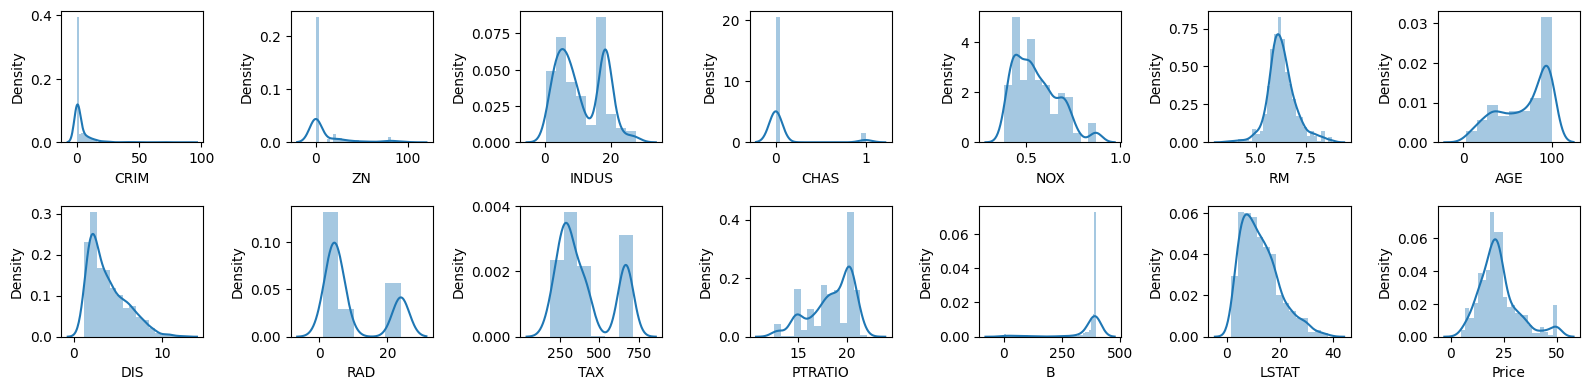

In [ ]:
rows = 2
cols = 7
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))

col = df.columns
index =0

for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]], ax = ax[i][j])
    index = index +1

plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


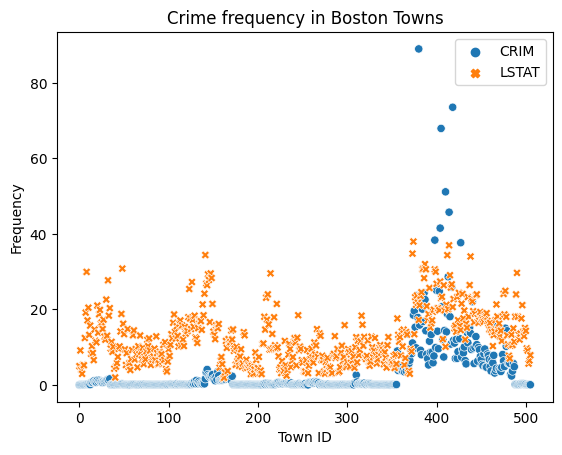

In [ ]:
test = sns.scatterplot(data = df[["CRIM", "LSTAT"]])
plt.xlabel("Town ID")
plt.ylabel("Frequency")
plt.title("Crime frequency in Boston Towns")
plt.savefig('/content/mnt/My Drive/graph.pdf')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

# df column 갯수를 받기 위해서 사용한 변수
total_items = len(df.columns)
# 한 행 보여줄 subplot의 갯수를 지정
items_per_row = 4

total_rows = math.ceil(total_items /items_per_row)
fig = make_subplots(rows = total_rows, cols = items_per_row)

cur_row =1
cur_col = 1

for index, column in enumerate(df.columns):
  fig.add_trace(go.Box(y=df[column], name = column), row= cur_row, col=cur_col)

  if cur_col % items_per_row == 0:
    cur_col = 1
    cur_row = cur_row+1
  else :
    cur_col = cur_col +1
fig.update_layout(height= 1000, width=1000, showlegend=False)
fig.show()


In [ ]:
corrmat = df.corr()
corrmat


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

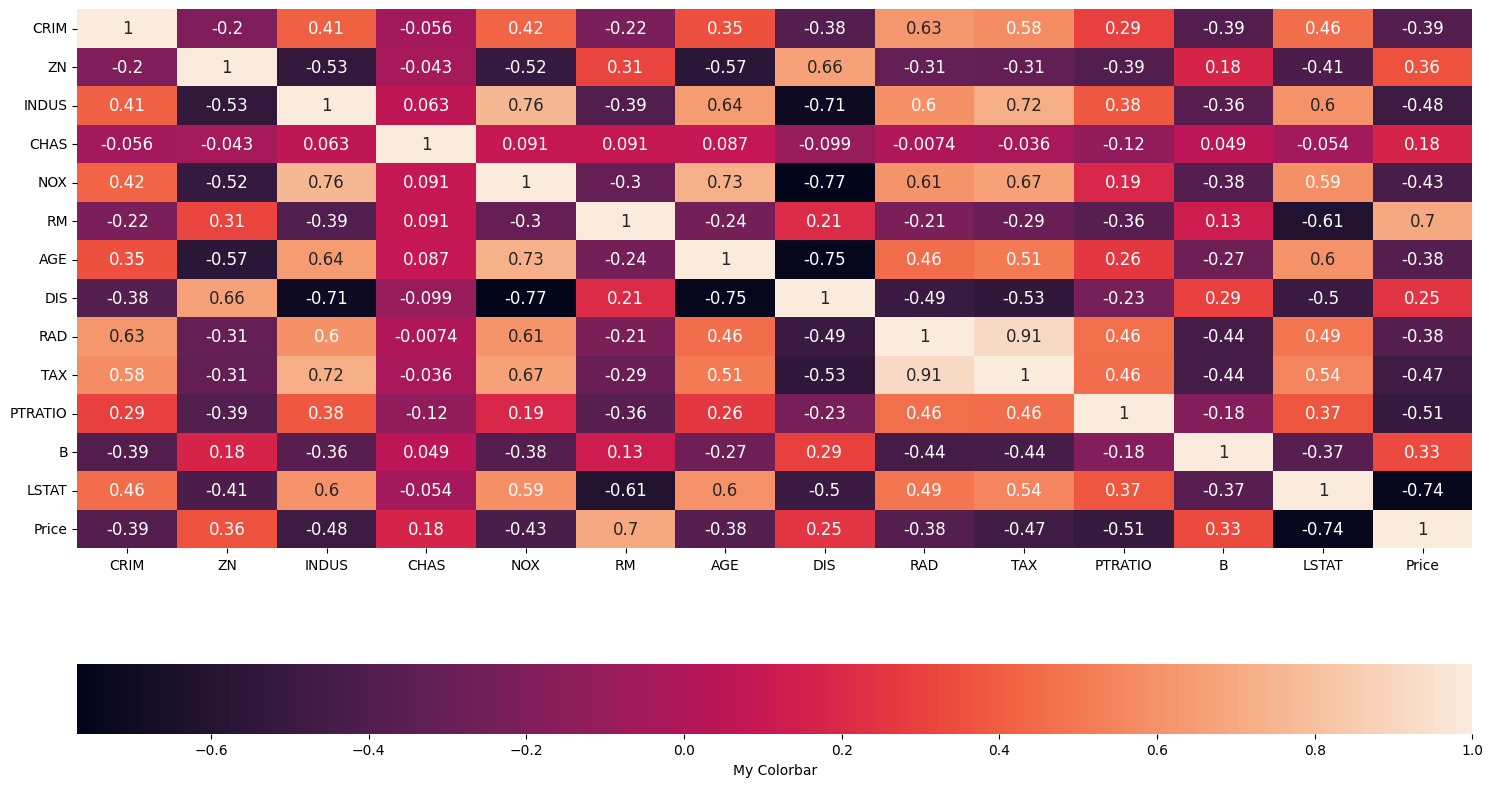

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot= True, annot_kws={'size':12},
            cbar_kws={'label' : 'My Colorbar', 'orientation':'horizontal'})

In [ ]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [ ]:
def getCF(corrdata, threshold):
  feature = []
  value = []

  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index]) > threshold:
      feature.append(index)
      value.append(corrdata[index])
  df = pd.DataFrame (data= value, index= feature, columns=['Corr. Values'])
  return df

In [ ]:
threshold = 0.5
corr_value = getCF(corrmat['Price'], threshold)
corr_value

,Corr. Values
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [ ]:
correlated_data = df[corr_value.index]
correlated_data.head(n = 10)

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


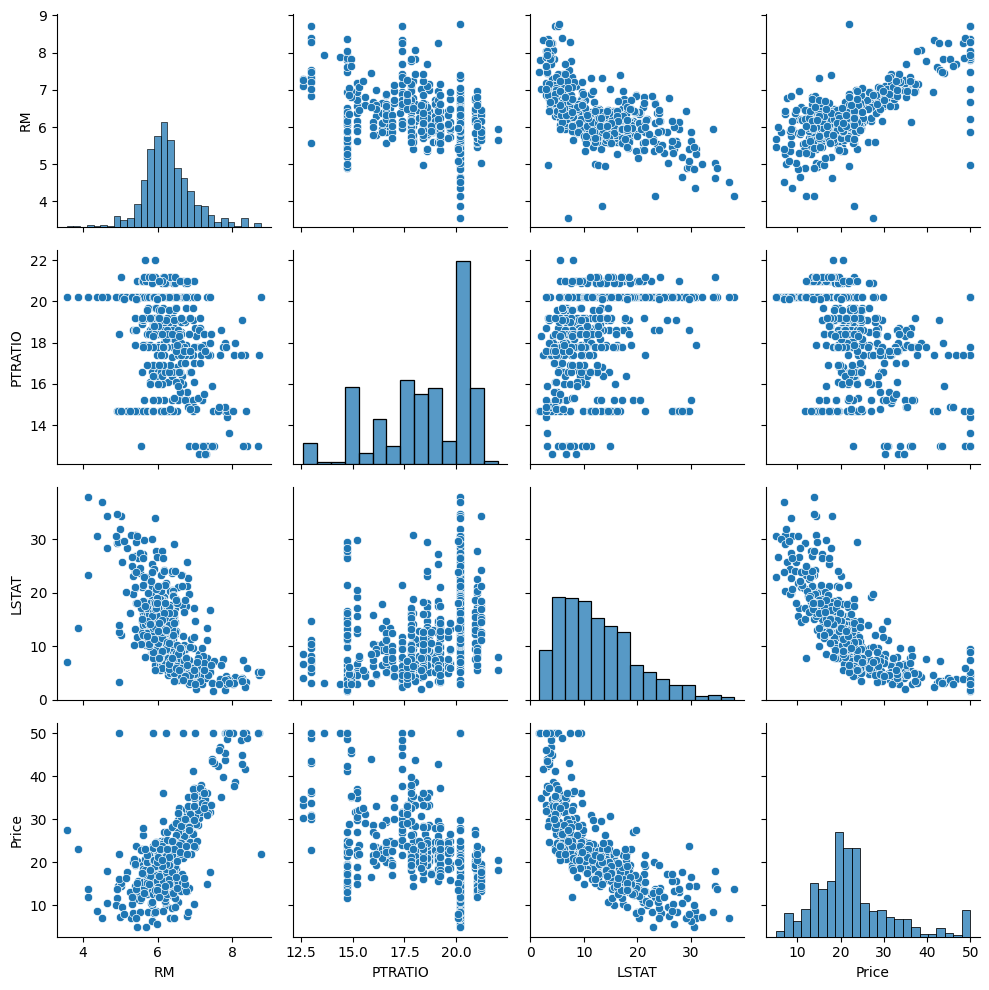

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

<Axes: >

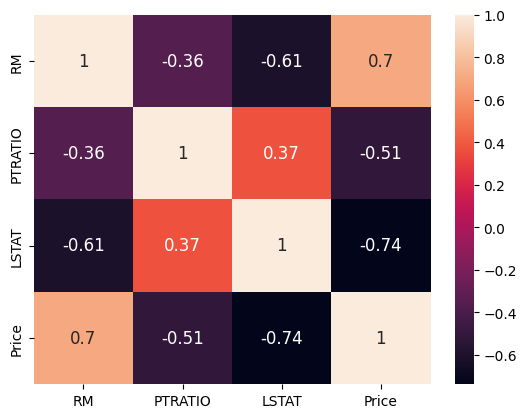

In [ ]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

In [ ]:
x = correlated_data.drop(labels =['Price'], axis=1)
y = correlated_data['Price']
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


## 4. Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Price']
y = df.loc[:, df.columns == 'Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=123)

#5. Standardization(표준화)

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train -mean)/std
X_test = (X_test - mean) / std

<ipython-input-12-f0d1dbfb7640>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LSTAT)


<Axes: xlabel='LSTAT', ylabel='Density'>

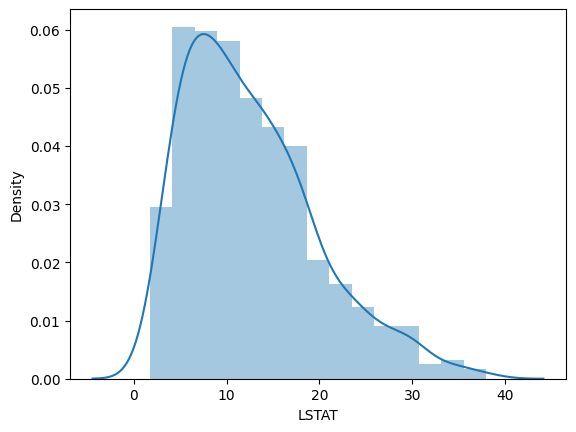

In [ ]:
sns.distplot(df.LSTAT)

<ipython-input-13-98c2883ac07d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.LSTAT)


<Axes: xlabel='LSTAT', ylabel='Density'>

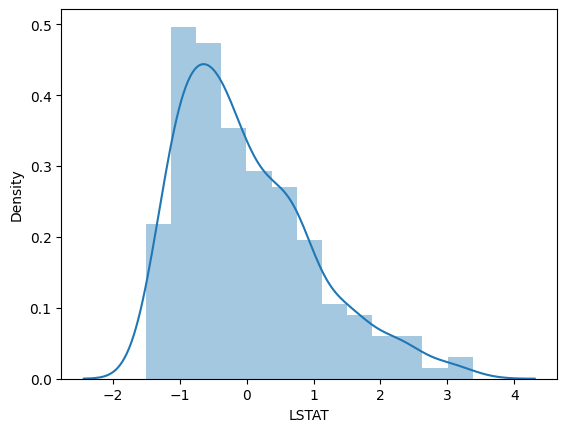

In [ ]:
sns.distplot(X_train.LSTAT)


## 6. Normalization

<ipython-input-14-0cabce445a95>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train2.LSTAT)


<Axes: xlabel='LSTAT', ylabel='Density'>

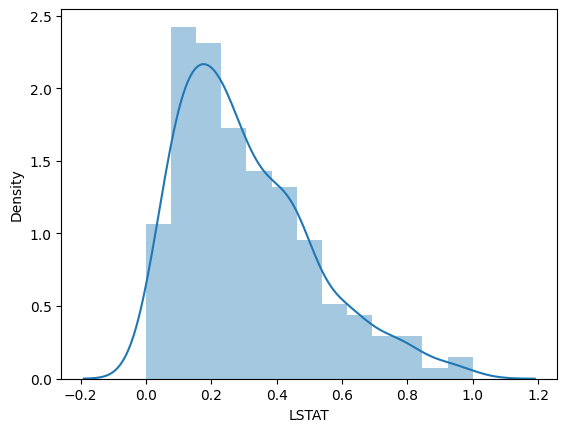

In [ ]:
min = X_train.min(axis=0)
max = X_train.max(axis=0)
X_train2= (X_train - min ) /(max-min)
X_test2 = (X_test - min) /(max-min)
sns.distplot(X_train2.LSTAT)

## 7.Build our model
Due to the small amount of presented data in this dataset, we must be careful to not create an overly complex model, which could lead to overfitting our data. For this, we are going to adopt an architecture based on two Dense layers, the first with 128 and the second with 64 neurons, both using a ReLU (Rectified Linear Unit) activation function. A dense layer with a linear activation will be used as output layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from keras.models import Sequential
#from keras.layers import Dense

# layer를 선형으로 연결해서 구성
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name = 'dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

## 8. Train our model
let's fit our model with both our features and their target values, for a total amount of 100 epochs, keeping apart of 5% of the samples as validation set.

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 49ms/step - loss: 556.2723 - mae: 21.7105 - val_loss: 558.8685 - val_mae: 21.7587
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 483.8971 - mae: 20.0539 - val_loss: 481.4904 - val_mae: 20.0385
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 396.8914 - mae: 17.8833 - val_loss: 382.2198 - val_mae: 17.6164
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 288.0702 - mae: 14.8394 - val_loss: 265.1882 - val_mae: 14.1925
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 176.9263 - mae: 11.1143 - val_loss: 158.5284 - val_mae: 10.6139
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 103.5460 - mae: 8.0195 - val_loss: 92.7614 - val_mae: 7.7633
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 71.4883 - mae: 6.3688 - val_loss: 60.2732 - val_mae: 6.0836
Epoch 8/100
11/11 [============================

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Training'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'], name='Validation'))
fig.update_layout(height=400, width=600,
                  xaxis_title="Epoch",
                  yaxis_title="MAE")
fig.show()

## 9. Evaluating our model with test dataset

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('MSE on test data:', mse_nn)
print('MAE on test data:', mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 18.4187 - mae: 2.7135
MSE on test data: 18.418724060058594
MAE on test data: 2.713468551635742


# Checking loss and MAE of our model as the number of epoch increases

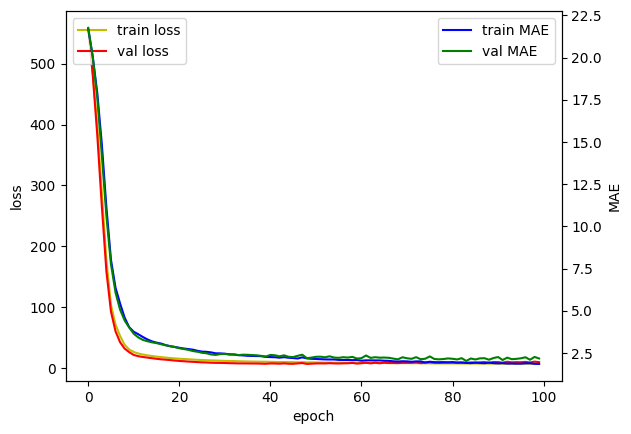

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.plot(history.history['mae'], 'b', label='train MAE')
acc_ax.plot(history.history['val_mae'], 'g', label='val MAE')
acc_ax.set_ylabel('MAE')
acc_ax.legend(loc='upper right')

plt.show()

# Prediction with our fitted model

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# standardization
scalarX, ScalarY = StandardScaler(), StandardScaler()
# regression data generation
Xnew, a = make_regression(n_samples=3, n_features=13, noise=0.1, random_state=1)
scalarX.fit(Xnew)
Xnew = scalarX.transform(Xnew)

ynew = model.predict(Xnew)

for i in range(len(Xnew)):
  print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 [==============================] - 0s 132ms/step
X=[-1.24246474  1.39964246  1.1714244  -0.87782339  0.42790918 -1.26002459
  0.48029733 -1.31495508  1.04774086 -0.55557632 -0.45508971 -0.5846418
  0.39587337], Predicted=[28.294104]
X=[ 0.03624432 -0.87518012  0.10045371  1.39915623  0.95338011  1.18611797
  0.91180006  0.20673387 -1.34647563 -0.84848943  1.38714393 -0.82286764
 -1.37371864], Predicted=[18.277475]
X=[ 1.20622042 -0.52446234 -1.27187811 -0.52133284 -1.38128929  0.07390662
 -1.39209739  1.10822121  0.29873477  1.40406575 -0.93205422  1.40750944
  0.97784527], Predicted=[17.668589]


# Comparision with traditional approaches
Let's compare our fitted model with the Linear Regression algorithm supported in Scikit-Learn package.

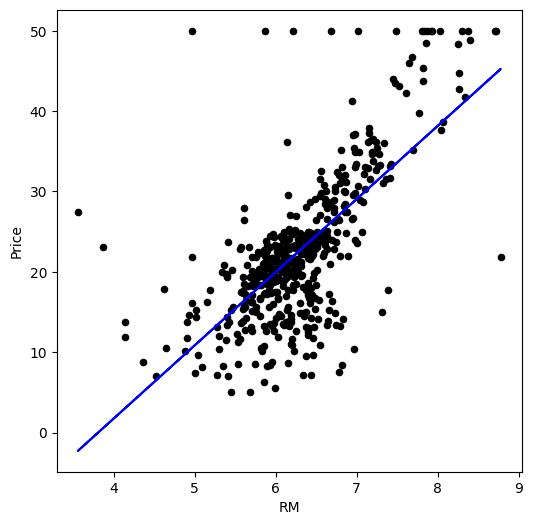

In [ ]:
from sklearn import linear_model as lm
from sklearn import metrics

#data = pd.DataFrame(boston_dataset.data)
#data.columns = boston_dataset.feature_names

#data['Price']= boston_dataset.target
regression = lm.LinearRegression()
regression.fit(X=pd.DataFrame(df['RM']), y=df['Price'])
prediction = regression.predict(X=pd.DataFrame(df['RM']))

df.plot(kind='scatter', x='RM', y = 'Price', figsize=(6,6), color='black')
plt.plot(df['RM'], prediction, color='b')

In [ ]:
lr_model = lm.LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)

print('MSE on test data :', mse_lr)
print('MAE on test data :', mae_lr)

MSE on test data : 28.405854810508238
MAE on test data : 3.6913626771162575


# Another useful graphs
Let's

In [ ]:
import numpy as np
#import math
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Scattergl(x=df[column],
                            y=df['Price'],
                            mode="markers",
                            marker=dict(size=3)),
                  row=cur_row,
                  col=cur_col)

    #polifit(x-cordinates, y-cordicates,차수)
    #최소제곱법으로 찾는 방식.
    #poly1d(coeffcient matrix)

    intercept = np.poly1d(np.polyfit(df[column], df['Price'], 3))(np.unique(df[column]))

    fig.add_trace(go.Scatter(x=np.unique(df[column]),
                             y=intercept,
                             line=dict(color='red', width=1)),
                  row=cur_row,
                  col=cur_col)

    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1

fig.update_layout(height=1500, width=850, showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



# SHAP values : opening the black box

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 21.4 MB/s eta 0:00:00


In [ ]:
type(X_train[:100].values)


numpy.ndarray

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


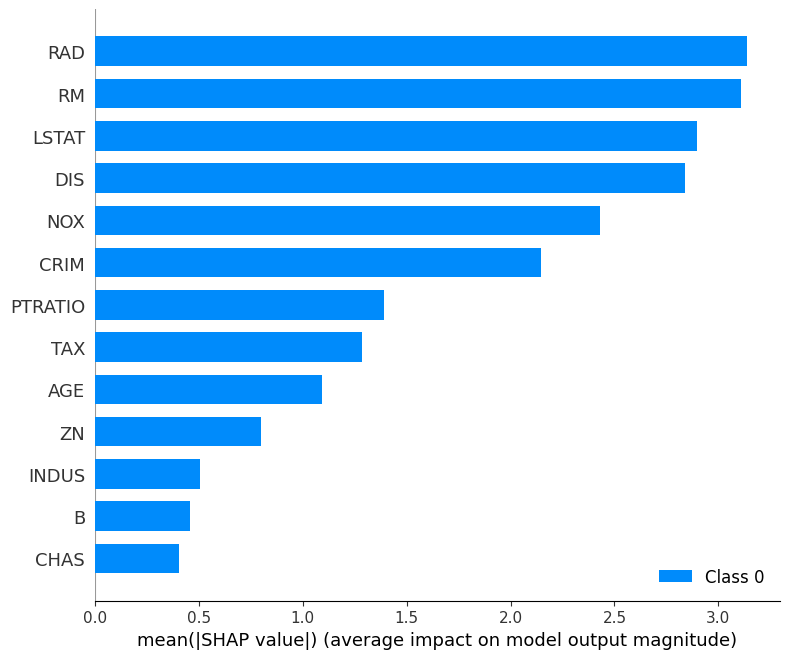

In [ ]:
import shap
shap.initjs()
explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values= explainer.shap_values(X_test[:100].values)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Your assignment
## Only those who want to do it, no evaluation:-)

## 1. Introduction of dataset
California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

## 2. Your assignment



In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


1. HouseAge 컬럼에 대한 distribution plot을 작성해서 pdf로 저장하기위한 코드 작성
2. threshold = 0.5로 하여, 컬럼간 correlation이 이 threshold를 넘는 컬럼들 간에만 heatmap을 작성하는 코드를 작성
3. Neural Network 기반의 Regression 모델을 작성
4. Training : Test 비율을 80:20으로 하여 모델을 학습하고, MSE, MAE로 평가
5. make_regression()을 이용해서 신규 데이터 5개를 생성하고, 학습된 모델을 통해 target(집값)을 예측하는 코드 작성

